In [75]:
import pandas as pd
import numpy as np 
from matplotlib import pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings("ignore")

In [2]:
# data

# need the CO2 and O3 data from last time, plus the manua loa data

# CO2 data from last time
lastdata = pd.read_csv('/Users/katherinemottola/Desktop/important/school/GEOL599/1_24_24/LA_AQS_2023.csv')

# manua loa data
ml = pd.read_csv('ManuaLoa_CO2.csv')

In [3]:
# tasks: 

# histogram of O3 concentrations (last time data)
# density plot of NO2 concentrations (^)
# scatterplot of O3 vs NO2 concentrations (^)
# a barchart with the number of days where O3 was greater than 35 ppb (^) - 1 bar per month 

# then make a really bad plot of average CO2 vs time from the manua loa data

In [76]:
# grab the stuff from last times data that i want, make separate 

df_o3 = lastdata[(lastdata['Parameter Name']=='Ozone')& (lastdata['Duration Description']=='1 HOUR')]
mean_o3 = df_o3["Arithmetic Mean"] # for ozone its in ppm currently
mean_o3 = mean_o3 *1000 # to ppb

df_no2 = lastdata[(lastdata['Parameter Name']=='Nitrogen dioxide (NO2)')& (lastdata['Duration Description']=='1 HOUR')]
mean_no2 = df_no2["Arithmetic Mean"]

# change to datetime i think?

df_o3["Date (Local)"] = pd.to_datetime(df_o3["Date (Local)"])
df_no2["Date (Local)"] = pd.to_datetime(df_no2["Date (Local)"])

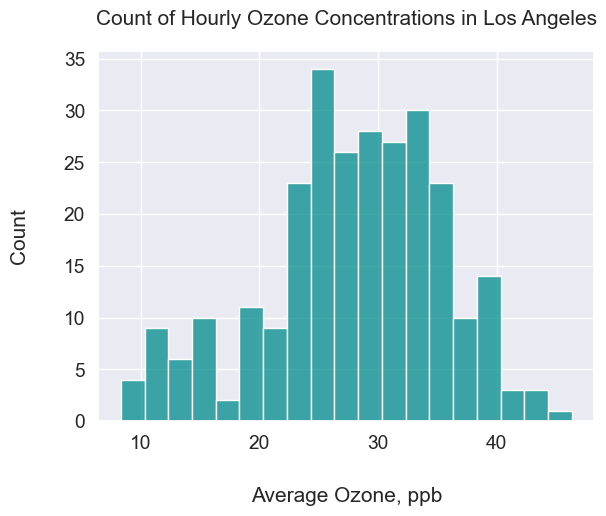

In [95]:
fig, ax = plt.subplots()

sns.set_theme(style='darkgrid',font_scale=1.25)
hist = sns.histplot(data=mean_o3, color='darkcyan', binwidth=2)

hist.set_title('Count of Hourly Ozone Concentrations in Los Angeles', y = 1.05)
hist.set_xlabel('Average Ozone, ppb')
hist.set_ylabel('Count')

ax.xaxis.labelpad = 25
ax.yaxis.labelpad = 25


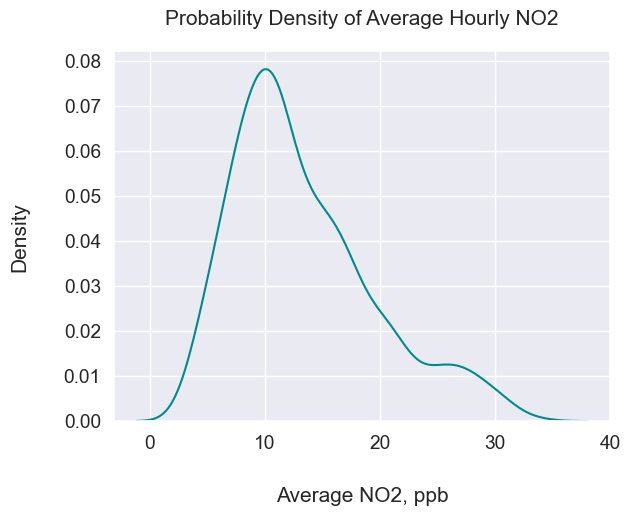

In [90]:
fig, ax = plt.subplots()

sns.set_theme(style='darkgrid',font_scale=1.25)
dens = sns.kdeplot(data=mean_no2, color='darkcyan')

dens.set_title('Probability Density of Average Hourly NO2', y = 1.05)
dens.set_xlabel('Average NO2, ppb')
dens.set_ylabel('Density')

ax.xaxis.labelpad = 25
ax.yaxis.labelpad = 25


In [7]:
# merging o3 and no2 data around date

df_1 = pd.DataFrame(data = {"Mean O3" : df_o3['Arithmetic Mean'], 'date' : df_o3['Date (Local)']})
df_2 = pd.DataFrame(data = {"Mean NO2" : df_no2['Arithmetic Mean'], 'date' : df_no2['Date (Local)']})
df_all = df_1.merge(df_2, on=['date'])


In [92]:
df_all['Mean O3'] = df_all['Mean O3']*1000

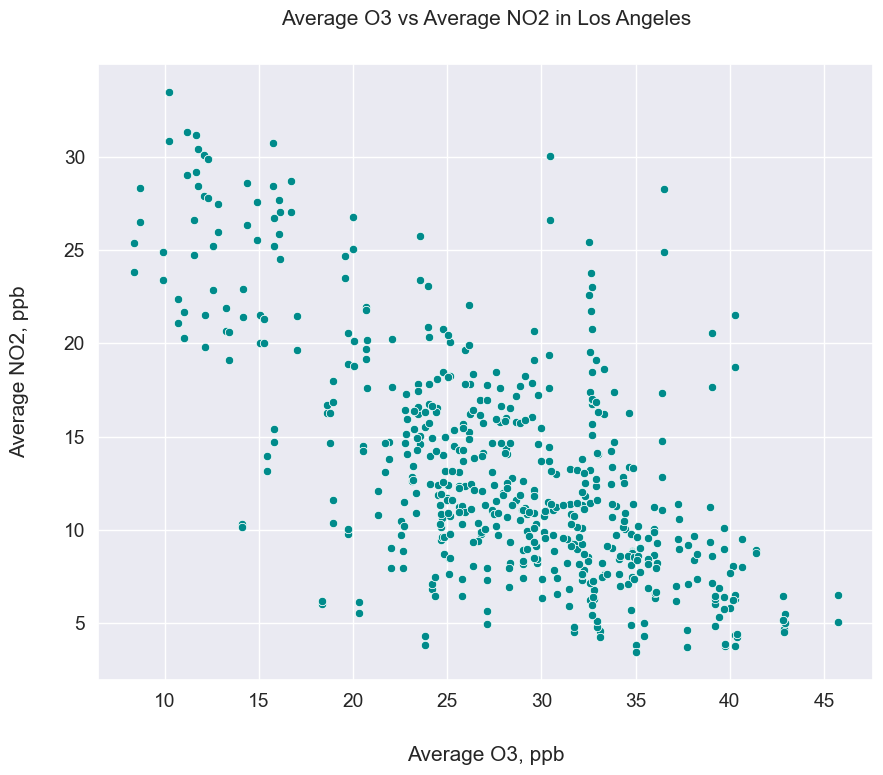

In [98]:
fig, ax = plt.subplots(figsize=(10,8))

sns.set_theme(style='darkgrid',font_scale=1.25)
vs = sns.scatterplot(data=df_all, x="Mean O3", y="Mean NO2", color='darkcyan')

vs.set_title('Average O3 vs Average NO2 in Los Angeles', y =1.05)

vs.set_xlabel('Average O3, ppb')
vs.set_ylabel('Average NO2, ppb')

ax.xaxis.labelpad = 25
ax.yaxis.labelpad = 25

In [10]:
df_o3

,State Code,County Code,Site Number,Parameter Code,POC,Latitude,Longitude,Datum,Parameter Name,Duration Description,...,AQI,Daily Criteria Indicator,Tribe Name,State Name,County Name,City Name,Local Site Name,Address,MSA or CBSA Name,Data Source
20,6,37,1103,44201,1,34.06659,-118.22688,WGS84,Ozone,1 HOUR,...,.,Y,NaN,California,Los Angeles,Los Angeles,Los Angeles-North Main Street,"1630 N MAIN ST, LOS ANGELES","Los Angeles-Long Beach-Anaheim, CA",AQS Data Mart
64,6,37,1103,44201,1,34.06659,-118.22688,WGS84,Ozone,1 HOUR,...,.,Y,NaN,California,Los Angeles,Los Angeles,Los Angeles-North Main Street,"1630 N MAIN ST, LOS ANGELES","Los Angeles-Long Beach-Anaheim, CA",AQS Data Mart
204,6,37,1103,44201,1,34.06659,-118.22688,WGS84,Ozone,1 HOUR,...,.,Y,NaN,California,Los Angeles,Los Angeles,Los Angeles-North Main Street,"1630 N MAIN ST, LOS ANGELES","Los Angeles-Long Beach-Anaheim, CA",AQS Data Mart
228,6,37,1103,44201,1,34.06659,-118.22688,WGS84,Ozone,1 HOUR,...,.,Y,NaN,California,Los Angeles,Los Angeles,Los Angeles-North Main Street,"1630 N MAIN ST, LOS ANGELES","Los Angeles-Long Beach-Anaheim, CA",AQS Data Mart
271,6,37,1103,44201,1,34.06659,-118.22688,WGS84,Ozone,1 HOUR,...,.,Y,NaN,California,Los Angeles,Los Angeles,Los Angeles-North Main Street,"1630 N MAIN ST, LOS ANGELES","Los Angeles-Long Beach-Anaheim, CA",AQS Data Mart
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21122,6,37,1103,44201,1,34.06659,-118.22688,WGS84,Ozone,1 HOUR,...,.,Y,NaN,California,Los Angeles,Los Angeles,Los Angeles-North Main Street,"1630 N MAIN ST, LOS ANGELES","Los Angeles-Long Beach-Anaheim, CA",AQS Data Mart
21168,6,37,1103,44201,1,34.06659,-118.22688,WGS84,Ozone,1 HOUR,...,.,N,NaN,California,Los Angeles,Los Angeles,Los Angeles-North Main Street,"1630 N MAIN ST, LOS ANGELES","Los Angeles-Long Beach-Anaheim, CA",AQS Data Mart
21218,6,37,1103,44201,1,34.06659,-118.22688,WGS84,Ozone,1 HOUR,...,.,N,NaN,California,Los Angeles,Los Angeles,Los Angeles-North Main Street,"1630 N MAIN ST, LOS ANGELES","Los Angeles-Long Beach-Anaheim, CA",AQS Data Mart
21261,6,37,1103,44201,1,34.06659,-118.22688,WGS84,Ozone,1 HOUR,...,.,Y,NaN,California,Los Angeles,Los Angeles,Los Angeles-North Main Street,"1630 N MAIN ST, LOS ANGELES","Los Angeles-Long Beach-Anaheim, CA",AQS Data Mart


In [11]:
# new guy
o3_new = df_o3[['Arithmetic Mean','Date (Local)']].copy()

# changing ppm to ppb
o3_new["Arithmetic Mean"] = o3_new["Arithmetic Mean"]*1000

# get rid of columns that are not over 35 ppb
o3_new = o3_new[o3_new['Arithmetic Mean'] >= 35]

# new column for month
copied_date = o3_new['Date (Local)'].copy()

# Add the copied column back to the DataFrame with a new column name
o3_new['Month'] = copied_date

In [12]:
max_ozone_idx = o3_new.groupby('Date (Local)')['Arithmetic Mean'].idxmax()

# Keep only the rows with max ozone value for each unique day it kind of doesnt matter anyway bc they're all already over 35
# and im plotting count rather than value 
# i think..

o3_new = o3_new.loc[max_ozone_idx]

In [14]:
# Convert the month numbers to month names
o3_new['Month'] = o3_new['Month'].dt.strftime('%B')


In [21]:
count_per_month = o3_new.groupby('Month').size().reset_index(name='Count')

In [22]:
count_per_month

,Month,Count
0,April,11
1,August,1
2,February,2
3,July,3
4,June,3
5,March,5
6,May,8
7,September,10


In [27]:
month_order = ['January', 'February', 'March', 'April', 'May', 'June', 'July', 'August', 'September', 'October', 'November', 'December']

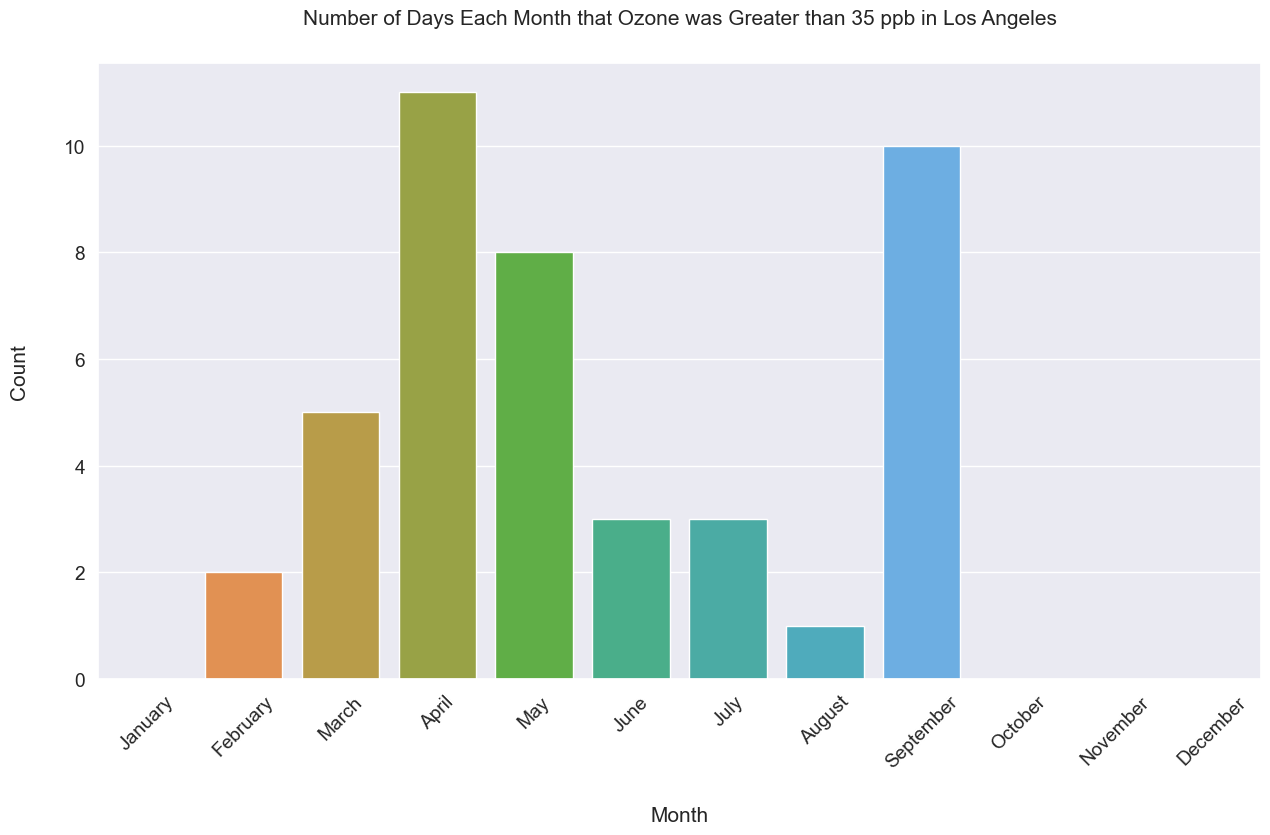

In [96]:
# a barchart with the number of days where O3 was greater than 35 ppb in each month (x number of days in jan, x in feb, so on)

fig, ax = plt.subplots(figsize=(15,8))
sns.set_theme(style='darkgrid',font_scale=1.25)

bar = sns.barplot(data=count_per_month, x='Month', y='Count', order=month_order)

ax.tick_params(axis='x', rotation=45)
bar.set_title('Number of Days Each Month that Ozone was Greater than 35 ppb in Los Angeles', y=1.05)

ax.xaxis.labelpad = 25
ax.yaxis.labelpad = 25

Text(0.5, 1, 'co2')

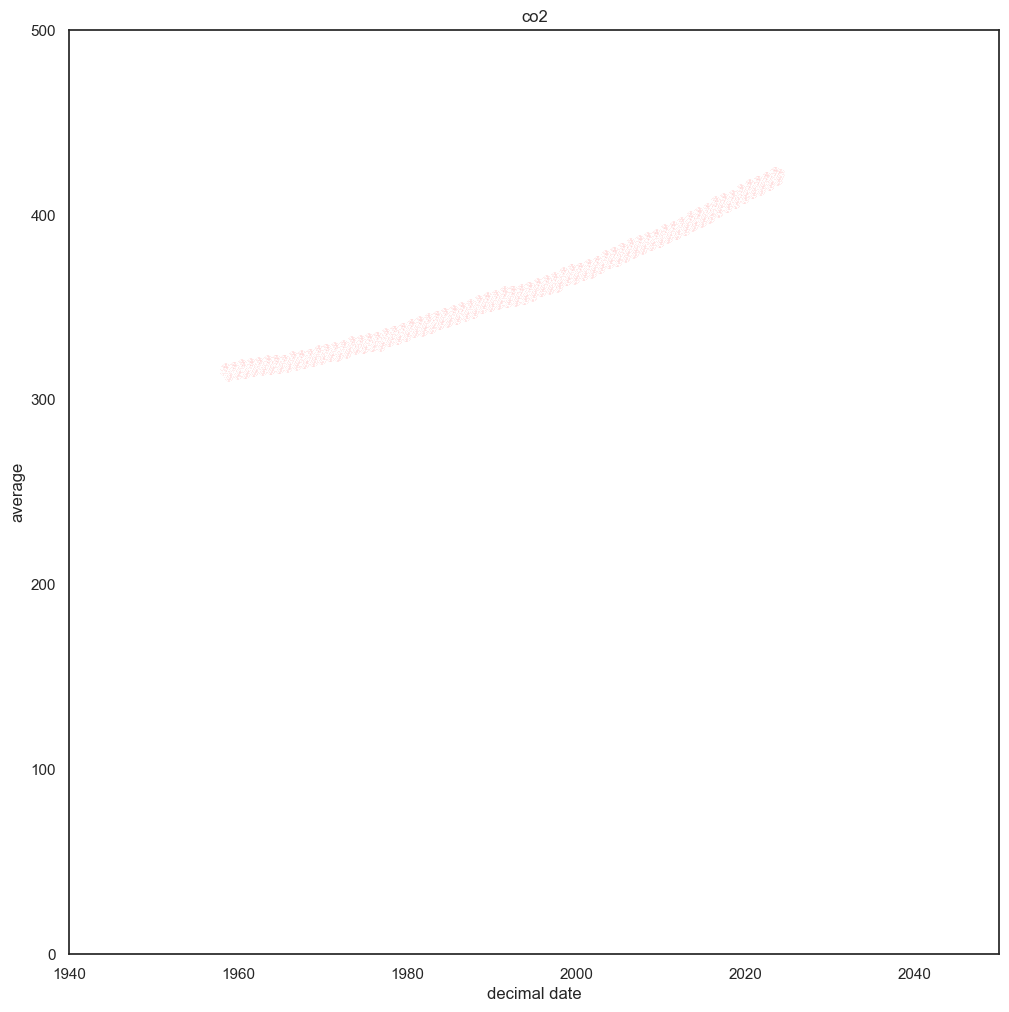

In [73]:
fig, ax = plt.subplots(figsize=(12,12))

sns.set_theme(style="white")
bad = sns.scatterplot(data=ml, x="decimal date", y="average", color='red', marker=r'$☹️$')

ax.set_xlim(1940, 2050)  
ax.set_ylim(0, 500)

bad.set_title('co2', y =1)
